<h1> Benchmarking Code & Plot</h1>

In the benchmarking application below:

- The 5 sorting algorithms are imported which supplies the individual algorithm method. These were explained earlier.

- The necessary programs are imported. Pandas to build a dataframe. Time to calculate runs. Numpy to get average run times. Random to generate random arrays and Matplotlib to plot the results.

- A function (timer) is created for timing the algorithm runs. The built in python time module is utilised here. The function call or pulls in the individual algorithms and input size/length (n). A loop in the main function ensure this timing process repeats through the various sorts for each n.

- A function (random_array) is created to generate the random arrays which will be sorted. Pythons random module is imported these randoms generated using the randint funtion. Random integers between 0-99 are generated in array length from input size n. 

- A function (main) is created with a main procedure which:
    - creates arrays to store average run times (10 runs) for each algorithm
    - an input list is outlined ie. values for n
    - for each n:
        - creates arrays for 10 run times storage
        - loops through the 10 runs. The unique sort algorithms and random arrays are pulled into the timer and when time is calculated the result is appended to array created to store times.
        - numpy is used to generate the average of the 10 runs. This average is * 1000 to convert to milliseconds and set to 3 decimal places as required.
     - A dataframe is created and columns outlined with inout_size set as the index. This helps display the resulting data clearly.
     - Dataframe is generated.
     
- Option to save results as csv file.



In [1]:
import bubble 
import merge 
import selection
import insertion
import counting

# import libraries necessary
import pandas as pd
import time
import numpy as np
from random import randint
import matplotlib.pyplot as plt 


# define timer function to calculte run times
# code adapted from: https://docs.python.org/3/library/time.html
def timer(algorithm,input_array):
   
    # start clock
    # insert sorting algorithm to run
    # stop clock 
    start_time = time.time()
    algorithm(input_array)
    end_time = time.time()

    # calculate elapsed/completion time of run
    time_elapsed = (end_time - start_time)
    return time_elapsed

# code adapted from: https://docs.python.org/3/library/random.html
def random_array(n):
     
    # create an empty array
    array = []

    # Loop from 0 (lower limit) to n (upper limit), step = 1
    for i in range (0,n,1):
    # Append randoms generated to array created.
    # Random integer range is 0-99. 
        array.append(randint(0,100))
    return array

def main():
    
    # create arrays to store average run times
    bubble_avg = []
    merge_avg = []
    insertion_avg = []
    selection_avg = []
    counting_avg= []
    
    # outline the list sizes of generated integers by random_array() method. this is input size.
    input_length = [100, 500, 750, 1500, 3000, 4500, 6000, 7000, 8000, 10000]

    
     #loop through various n in input_sizes
    for n in input_length:

    # copy of generated_array
        input_array = random_array(n)

        # create arrays to store the 10 running times for each n
        bubble_runs = []
        merge_runs = []
        insertion_runs = []            
        selection_runs = []
        counting_runs = []
    
        # range set at 10 so the process is run 10 times
        # calls timing function method for each sorting algorithm 
        # appended results to lists created

        for i in range(10):
            #each algorithm/input size is fed into timer to calculate run times. Results are appended to arrays (eg. bubble_runs[]         
            bubble_runs.append(timer(bubble.bubbleSort,input_array))
            merge_runs.append(timer(merge.mergeSort,input_array))
            insertion_runs.append(timer(insertion.insertionSort,input_array))
            selection_runs.append(timer(selection.selectionSort,input_array)) 
            counting_runs.append(timer(counting.countingSort,input_array))

        # get average value using numpy
        # code adapted from :https://numpy.org/doc/stable/reference/generated/numpy.around.html
        # multiply by 1000 to convert to milliseconds and round to 3 decimal places as required
        # appended data generated to arrays (eg. bubble_avg[])
        bubble_avg.append(np.around(np.mean(bubble_runs)*1000,3))
        merge_avg.append(np.around(np.mean(merge_runs)*1000,3))
        insertion_avg.append(np.around(np.mean(insertion_runs)*1000,3))
        selection_avg.append(np.around(np.mean(selection_runs)*1000,3))
        counting_avg.append(np.around(np.mean(counting_runs)*1000,3))

    #  Create a dataframe to store/present data
    sorting_df = pd.DataFrame()
    
    # Pull input_size/algos/times into dataframe 
    # create columns in df. 
    sorting_df['Input Size'] = input_length
    sorting_df['Bubble Algorithm'] = bubble_avg
    sorting_df['Merge Algorithm'] = merge_avg
    sorting_df['Insertion Algorithm'] = insertion_avg
    sorting_df['Selection Algorithm'] = selection_avg
    sorting_df['Counting Algorithm'] = counting_avg

    # Set 'Size' as the index for df
    sorting_df.set_index('Input Size', inplace = True)

    # Return dataframe
    return(sorting_df)


df = main()             

df                     #display dataframe

,Bubble Algorithm,Merge Algorithm,Insertion Algorithm,Selection Algorithm,Counting Algorithm
Input Size,,,,,
100,1.016,0.599,0.000,0.778,0.100
500,25.228,3.392,0.300,18.450,0.303
750,58.145,5.381,0.100,41.095,0.299
1500,263.518,12.143,0.798,186.801,0.798
3000,1013.282,23.547,1.295,679.982,0.897
4500,2290.666,38.400,1.897,1525.219,1.599
6000,4088.458,56.958,2.386,2736.976,1.900
7000,5910.367,63.229,2.688,4062.342,1.917
8000,7427.476,70.085,2.919,4982.588,2.476


In [2]:
#record results as csv file
df.to_csv('Results.csv')


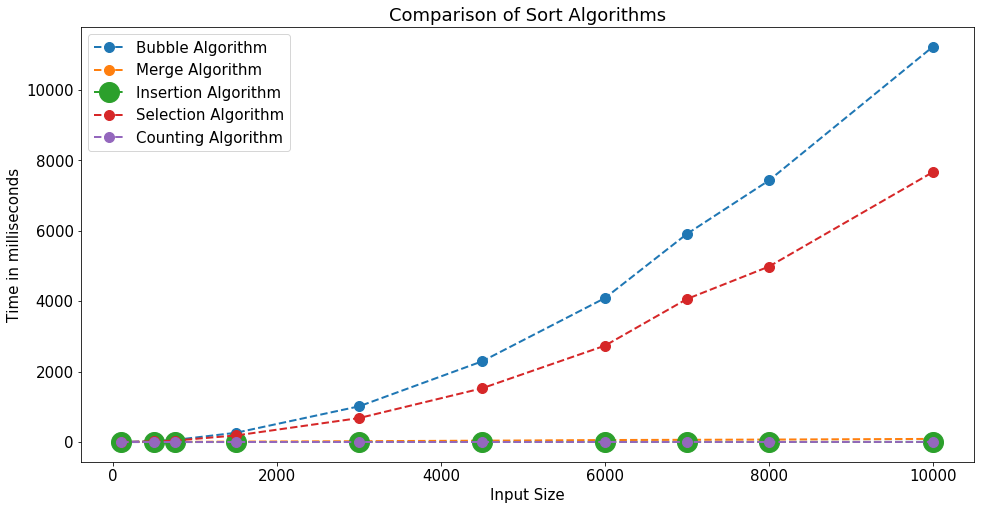

In [3]:
#pandas dataframe in a plot

#matplotlib pyplot documentation: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.html

# Code adapted from: https://matplotlib.org/tutorials/introductory/customizing.html
plt.rcParams['figure.figsize'] = (16, 8)             #plot size set
plt.rcParams['lines.linewidth'] = 2.0                #line width set
plt.rcParams['lines.linestyle'] = '--'               # line style set (broken line)
plt.rcParams['font.size'] = 15.0                     #set font size
                

# take columns from the pandas dataframe created already
# set marker as point and define it's size (20)
                                     
plt.plot(df.index, df['Bubble Algorithm'], marker='.', markersize=20)    
plt.plot(df.index, df['Merge Algorithm'], marker='.', markersize=20)
plt.plot(df.index, df['Insertion Algorithm'], marker='o', markersize=20)    #marker different(bigger) as path similar to counting. 
plt.plot(df.index, df['Selection Algorithm'], marker='.', markersize=20)
plt.plot(df.index, df['Counting Algorithm'], marker='.', markersize=20) 

# set plot title
plt.title('Comparison of Sort Algorithms')

# set x and y variables
plt.xlabel('Input Size')                        #X Label is input sizes (n)
plt.ylabel('Time in milliseconds')              #Y Label is avg of 10 runs

# set a legend
plt.legend()
# display plot
plt.show()